In [5]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [6]:
def mandelbrot_point(c, n_iterations, threshold=2):
    z = 0
    n = 0 
    for n in range(n_iterations):
        z = z**2 + c

        # threshold - usually 2
        if abs(z) > threshold:
            break
    return n

def mandelbrot(x_start, x_end, y_start, y_end, x_resolution, n_iterations, threshold):
    y_resolution = int(x_resolution*(y_end-y_start)/(x_end-x_start))
    points_to_draw = np.zeros((y_resolution, x_resolution))

    for x in range(x_resolution):
        for y in range(y_resolution):
            c = (x_end - x_start) * x/x_resolution + x_start + ((y_end - y_start) * -y/y_resolution + y_end)*1j
            # save threshold point as pixel value
            points_to_draw[y][x] = mandelbrot_point(c, n_iterations, threshold)

    plt.imshow(points_to_draw, cmap='hot', extent=(x_start, x_end, y_start, y_end))
    plt.xlabel("Re(c)")
    plt.ylabel("Im(c)")
    plt.show()

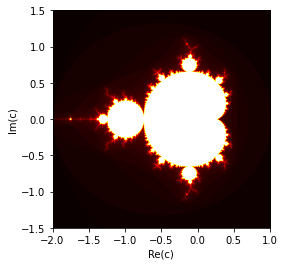

In [7]:
mandelbrot(x_start = -2, 
           x_end = 1, 
           y_start = -1.5001, 
           y_end = 1.5, 
           x_resolution = 1000, 
           n_iterations = 100,
           threshold = 2)

In [8]:
from numpy import random

def monte_carlo_mandelbrot(x_values, y_values, iterations):
    in_area = 0
    x_in_area = []
    y_in_area = []
    
    for i in range(len(x_values)):
        c = x_values[i] + y_values[i]*1j
        # print(i)

        if mandelbrot_point(c, iterations) == iterations - 1:
            x_in_area.append(x_values[i])
            y_in_area.append(y_values[i])
            in_area += 1

    return in_area, x_in_area, y_in_area

In [10]:
def random_sampling(s, i, x_start, x_end, y_start, y_end):
    x_values = random.uniform(x_start, x_end, s)
    y_values = random.uniform(y_start, y_end, s)
    
    in_area, x_in_area, y_in_area = monte_carlo_mandelbrot(x_values, y_values, i)
    area = (x_end-x_start)*(y_end-y_start)*in_area/float(s)

    # print(f"Area = {area}")
    # plt.scatter(x_in_area, y_in_area)
    # plt.show()

    return area

# random_sampling(s = 50000,
#                 i = 1000,
#                 x_start = -2,
#                 x_end = 1,
#                 y_start = -1.5001,
#                 y_end = 1.5)

In [48]:
def s_i_balancing(j_vals, max_i, s, n):

    area_is = random_sampling(s = s,
                            i = max_i,
                            x_start = -2,
                            x_end = 1,
                            y_start = -1.5001,
                            y_end = 1.5)


    mean_area_error = []
    std_area_error = []
    for j in j_vals:

        print(j)
        area_errors = []
        for _ in range(n):
            print(_)

            area_js = random_sampling(s = s,
                                    i = int(j),
                                    x_start = -2,
                                    x_end = 1,
                                    y_start = -1.5001,
                                    y_end = 1.5)


            area_errors.append(area_js - area_is)

        mean_area_error.append(np.mean(area_errors))
        std_area_error.append(np.std(area_errors))
    


    return j_vals, mean_area_error, std_area_error



In [49]:
result1 = s_i_balancing(np.arange(1, 1010, 10), 1000, 10000, 50)


1
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
11
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
21
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
31
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
41
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
51
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
61
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


49
571
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
581
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
591
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
601
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
611
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
621
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
631
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
4

(array([   1,   11,   21,   31,   41,   51,   61,   71,   81,   91,  101,
        111,  121,  131,  141,  151,  161,  171,  181,  191,  201,  211,
        221,  231,  241,  251,  261,  271,  281,  291,  301,  311,  321,
        331,  341,  351,  361,  371,  381,  391,  401,  411,  421,  431,
        441,  451,  461,  471,  481,  491,  501,  511,  521,  531,  541,
        551,  561,  571,  581,  591,  601,  611,  621,  631,  641,  651,
        661,  671,  681,  691,  701,  711,  721,  731,  741,  751,  761,
        771,  781,  791,  801,  811,  821,  831,  841,  851,  861,  871,
        881,  891,  901,  911,  921,  931,  941,  951,  961,  971,  981,
        991, 1001]), [7.465748849999999, 0.4900483343999998, 0.19723257419999984, 0.10510550339999987, 0.07945464839999991, 0.05742191399999991, 0.039763325399999896, 0.0380352677999999, 0.027684922799999914, 0.023922797399999897, 0.011304376799999911, 0.011178372599999924, 0.00129604319999991, 0.0029160971999999097, -0.002286076200000089, 

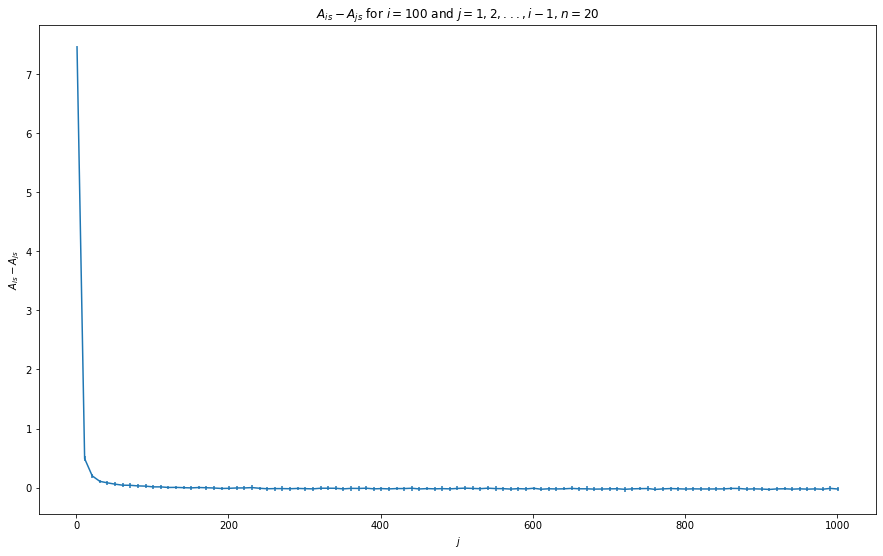

In [50]:
print(result1)
plt.figure(figsize = (15,9))
# plt.plot(result1[0], result1[1], 'c-')
plt.errorbar(result1[0], result1[1], yerr = result1[2])
plt.title(r'$A_{is} - A_{js}$ for $i = 100$ and $j = 1,2,..., i-1$, $n = 20$' )
plt.ylabel(r'$A_{is} - A_{js}$')
plt.xlabel(r'$j$')
plt.show()


In [45]:
result1 = s_i_balancing(1000, 10000, 50)


1


KeyboardInterrupt: 

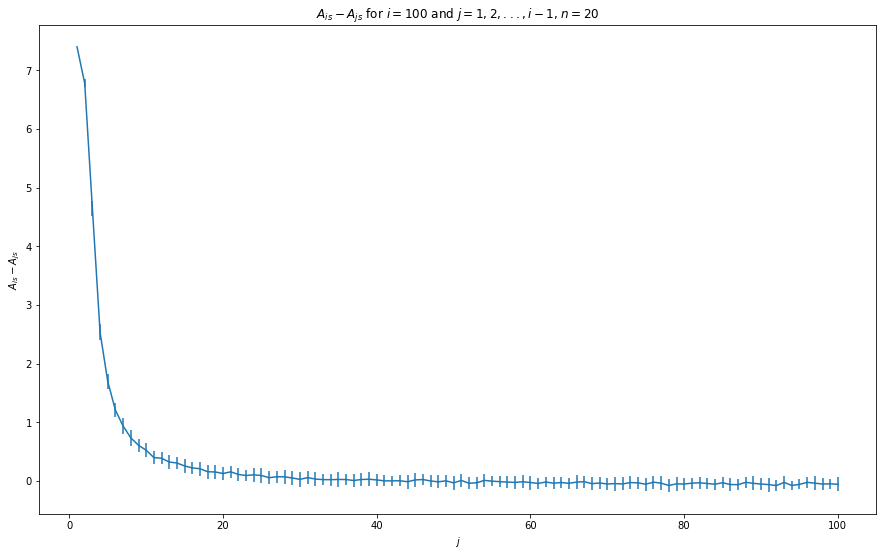

In [44]:
plt.figure(figsize = (15,9))
# plt.plot(result1[0], result1[1], 'c-')
plt.errorbar(result1[0], result1[1], yerr = result1[2])
plt.title(r'$A_{is} - A_{js}$ for $i = 100$ and $j = 1,2,..., i-1$, $n = 20$' )
plt.ylabel(r'$A_{is} - A_{js}$')
plt.xlabel(r'$j$')
plt.show()

Area = 1.508090268


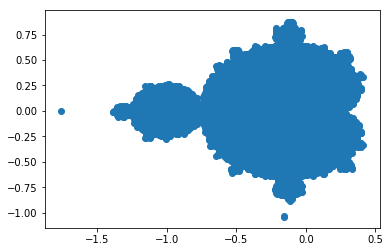

1.508090268

In [7]:
def latin_hypercube(s, i, x_start, x_end, y_start, y_end):
    x_bins = np.linspace(x_start, x_end, s+1)
    y_bins = np.linspace(y_start, y_end, s+1)
    x_values = []
    y_values = []

    for n in range(s):
        x_values.append(random.uniform(x_bins[n], x_bins[n+1]))
        y_values.append(random.uniform(y_bins[n], y_bins[n+1]))
    
    random.shuffle(x_values)
    random.shuffle(y_values)

    in_area, x_in_area, y_in_area = monte_carlo_mandelbrot(x_values, y_values, i)
    area = (x_end-x_start)*(y_end-y_start)*in_area/float(s)

    print(f"Area = {area}")
    plt.scatter(x_in_area, y_in_area)
    plt.show()

    return area
        
latin_hypercube(s = 50000,
                i = 1000,
                x_start = -2,
                x_end = 1,
                y_start = -1.5001,
                y_end = 1.5)

Area = 1.497109902


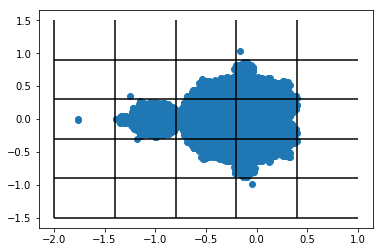

1.497109902

In [183]:
def orthogonal(s, i, divisions, x_start, x_end, y_start, y_end):
    if s % (divisions**2) != 0.0:
        print("Please make sure \"s\" is a multiple of \"divisions\"^2")
        return

    samples_per_block = int(s/(divisions**2))
    bins_per_block = samples_per_block*divisions

    x_bins = np.linspace(x_start, x_end, s+1)
    y_bins = np.linspace(y_start, y_end, s+1)

    x_blocks = []
    for block_x in range(divisions):
        x_blocks.append([])
        plt.vlines(x_bins[block_x*bins_per_block], y_start, y_end)
        for bin_x in range(bins_per_block):
            x_blocks[-1].append((x_bins[block_x*bins_per_block + bin_x], x_bins[block_x*bins_per_block + bin_x + 1]))
            # plt.vlines(x_bins[block_x*bins_per_block + bin_x], y_start, y_end, linestyles='dashed')
    x_blocks = [list(random.permutation(elem)) for elem in x_blocks]
    
    y_blocks = []
    for block_y in range(divisions):
        y_blocks.append([])
        plt.hlines(y_bins[block_y*bins_per_block], x_start, x_end)
        for bin_y in range(samples_per_block*divisions):
            y_blocks[-1].append((y_bins[block_y*bins_per_block + bin_y], y_bins[block_y*bins_per_block + bin_y + 1]))
            # plt.hlines(y_bins[block_y*bins_per_block + bin_y], x_start, x_end, linestyles='dashed')
    y_blocks = [list(random.permutation(elem)) for elem in y_blocks]

    x_values = []
    y_values = []

    for _ in range(samples_per_block):
        for b in range(divisions**2):
            x_bin = x_blocks[b%divisions].pop()
            y_bin = y_blocks[int(b/divisions)].pop()

            x_values.append(random.uniform(x_bin[0], x_bin[1]))
            y_values.append(random.uniform(y_bin[0], y_bin[1]))

    # plt.scatter(x_values, y_values)
    # plt.show()

    in_area, x_in_area, y_in_area = monte_carlo_mandelbrot(x_values, y_values, i)
    area = (x_end-x_start)*(y_end-y_start)*in_area/float(s)

    print(f"Area = {area}")
    plt.scatter(x_in_area, y_in_area)
    plt.show()

    return area
        
orthogonal(s = 50000,
           i = 1000,
           divisions = 5,
           x_start = -2,
           x_end = 1,
           y_start = -1.5001,
           y_end = 1.5)